In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 构建样本数据，x值从-4到5，每个数间隔为1
x = np.arange(-4, 5, 1)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [5]:
# y构建为0，1向量，且是线性不可分的
y = np.array((x >= -2) & (x <= 2), dtype='int')
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

In [10]:
[0]*len(x[y==0])

[0, 0, 0, 0]

In [11]:
x[y==0]

array([-4, -3,  3,  4])

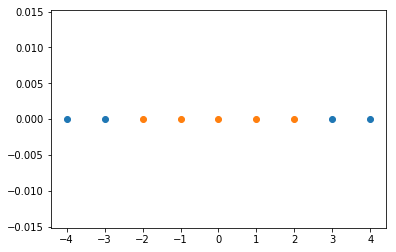

In [12]:
# 绘制样本数据
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()

In [13]:
def gaussian(x, l):
    # 这一节对gamma先不做探讨，先定为1
    gamma = 1.0
    # 这里x-l是一个数，不是向量，所以不需要取模
    return np.exp(-gamma * (x - l)**2)

In [14]:
# 将每一个x值通过高斯核函数和l1，l2地标转换为2个值，构建成新的样本数据
l1, l2 = -1, 1
X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)

In [15]:
X_new

array([[  1.23409804e-04,   1.38879439e-11],
       [  1.83156389e-02,   1.12535175e-07],
       [  3.67879441e-01,   1.23409804e-04],
       [  1.00000000e+00,   1.83156389e-02],
       [  3.67879441e-01,   3.67879441e-01],
       [  1.83156389e-02,   1.00000000e+00],
       [  1.23409804e-04,   3.67879441e-01],
       [  1.12535175e-07,   1.83156389e-02],
       [  1.38879439e-11,   1.23409804e-04]])

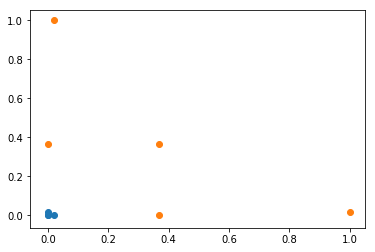

In [16]:
plt.scatter(X_new[y==0, 0], X_new[y==0, 1])
plt.scatter(X_new[y==1, 0], X_new[y==1, 1])
plt.show()

## scikit learn中的RBF核

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

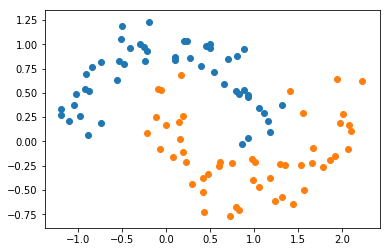

In [20]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [23]:
def RBFKernelSVC(gamma = 1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [24]:
rbf_svc = RBFKernelSVC(gamma=1)
rbf_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [25]:
def plot_decision_boundary(model, axis):
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    X0, X1 = np.meshgrid(
        # 随机两组数，起始值和密度由坐标轴的起始值决定
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    X_grid_matrix = np.c_[X0.ravel(), X1.ravel()]
    
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(X_grid_matrix)
    y_predict_matrix = y_predict.reshape(X0.shape)
    
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    my_colormap = ListedColormap(['#0000CD', '#40E0D0', '#FFFF00'])
    
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(X0, X1, y_predict_matrix, linewidth=5, cmap=my_colormap)

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


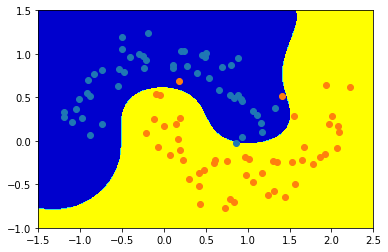

In [26]:
plot_decision_boundary(rbf_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [27]:
rbf_svc100 = RBFKernelSVC(gamma=100)
rbf_svc100.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


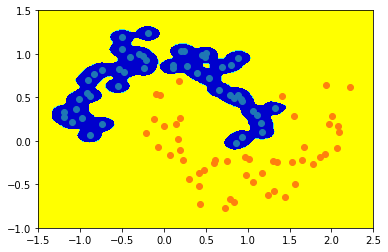

In [28]:
plot_decision_boundary(rbf_svc100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


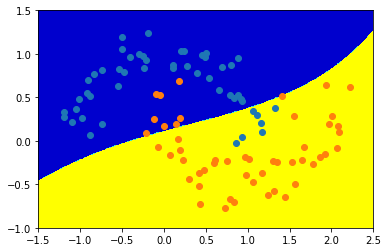

In [29]:
rbf_svc01 = RBFKernelSVC(gamma=0.1)
rbf_svc01.fit(X, y)

plot_decision_boundary(rbf_svc01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


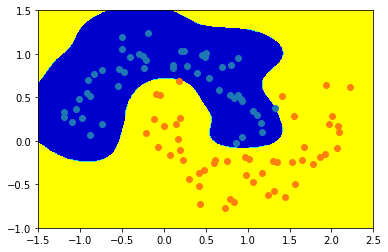

In [33]:
rbf_svc5 = RBFKernelSVC(gamma=5)
rbf_svc5.fit(X, y)

plot_decision_boundary(rbf_svc5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()